In [ ]:
__author__ = "Phillip Lakaschus"
__email__ = "lakaschus@th.physik.uni-frankfurt.de"

# 2D Euler Test Cases

In [1]:
import time
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import MaxNLocator  
from scipy.integrate import ode

%matplotlib inline

In [5]:
def spectral_radius_f(rho, x, y, e):
  """ spectral radius of matrix """ 
  ev1 = x/rho
  temp = np.sqrt( (1 - gam)*gam*(x**2+y**2 - 2*e*rho)/(2*rho**2) )
  #sqrt_arg = np.heaviside(sqrt_arg, 0)*sqrt_arg
  ev2 = ev1 - temp
  ev3 = ev1 + temp
  res = np.maximum(np.maximum(ev1, ev2), ev3)
  return (res > np.zeros(res.shape)).astype(int)*res

def spectral_radius_g(rho, x, y, e):
  """ spectral radius of matrix """ 
  ev1 = y/rho
  temp = np.sqrt( (1 - gam)*gam*(x**2+y**2 - 2*e*rho)/(2*rho**2) )
  #sqrt_arg = np.heaviside(sqrt_arg, 0)*sqrt_arg
  ev2 = ev1 - temp
  ev3 = ev1 + temp
  res = np.maximum(np.maximum(ev1, ev2), ev3)
  return (res > np.zeros(res.shape)).astype(int)*res

def cid(arg1, arg2, arg3, arg4):
  """ create init data """
  return (arg1*np.heaviside(x_ax - 0.5, 0)*np.heaviside(y_ax - 0.5, 0)
   + arg2*(1 - np.heaviside(x_ax - 0.5, 0))*np.heaviside(y_ax - 0.5, 0)
   + arg3*(1 - np.heaviside(x_ax - 0.5, 0))*(1 - np.heaviside(y_ax - 0.5, 0))
   + arg4*np.heaviside(x_ax - 0.5, 0)*(1 - np.heaviside(y_ax - 0.5, 0)))
  
def u_to_x(rho, u):
  return rho*u

def v_to_y(rho, v):
  return rho*v

def p_to_e(p, rho, u, v):
  return p/(gam - 1) + rho/2*(u**2 + v**2)

# First Order Scheme

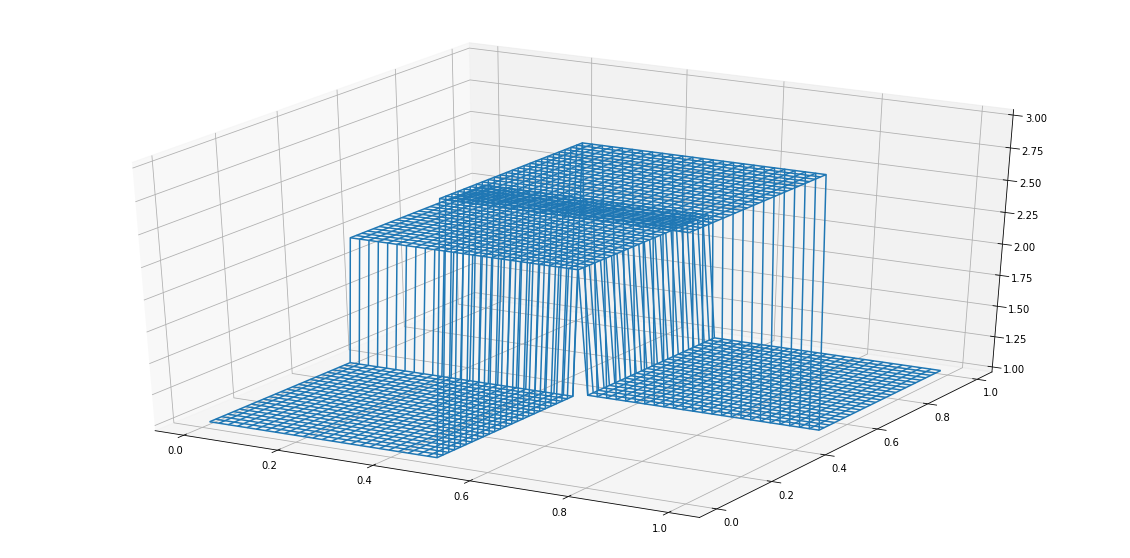

flow time:  0.000681643197250017
flow time:  0.00500016538600326
flow time:  0.010000051549468331
flow time:  0.01500091853681038
flow time:  0.0200011045914949
flow time:  0.025001159138030724
flow time:  0.030000799688824555
flow time:  0.0350011975176244
flow time:  0.040000359904435914
flow time:  0.04500099633141878
flow time:  0.0500008374858181
flow time:  0.0550006470340416
flow time:  0.06000034712641723
flow time:  0.06500102523564402
flow time:  0.0700001831308117
flow time:  0.07500008929558848
flow time:  0.08000028020402225
flow time:  0.08500146064100973
flow time:  0.09000156435293251
flow time:  0.09500023028952398
flow time:  0.10000070338975126
flow time:  0.10500172232053465
flow time:  0.11000176317781835
flow time:  0.11500079089970006
flow time:  0.12000048017670831
flow time:  0.1250000789514398
flow time:  0.13000307901929892
flow time:  0.13500025571878582
flow time:  0.14000065634173037
flow time:  0.1450013564854239
flow time:  0.15000239956636435
flow time:

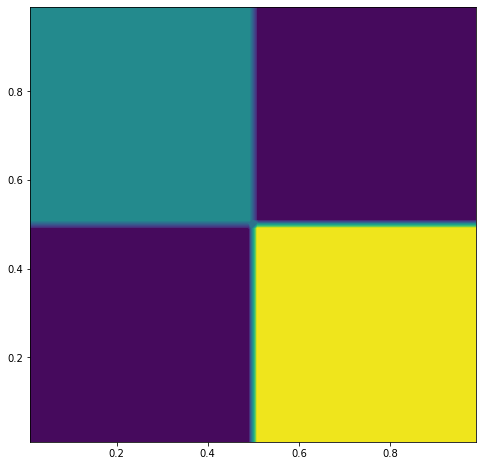

time:  0.0


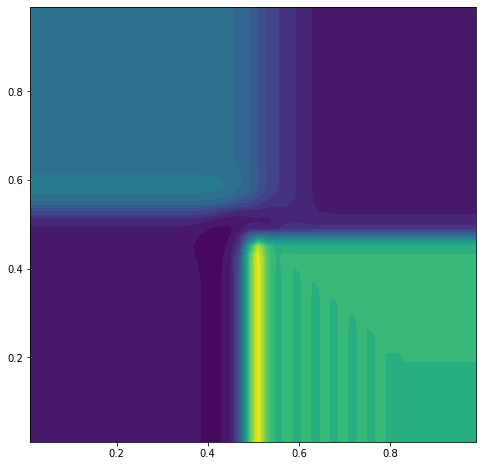

time:  0.048484848484848485


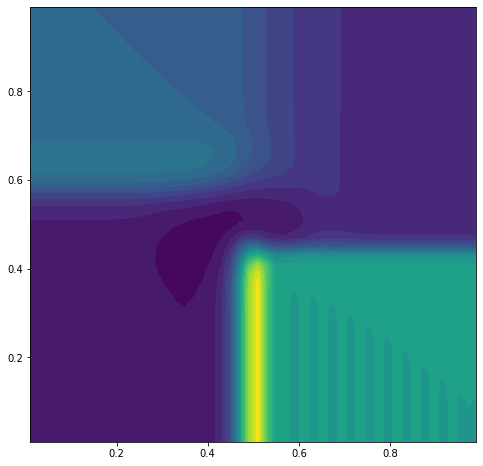

time:  0.09696969696969697


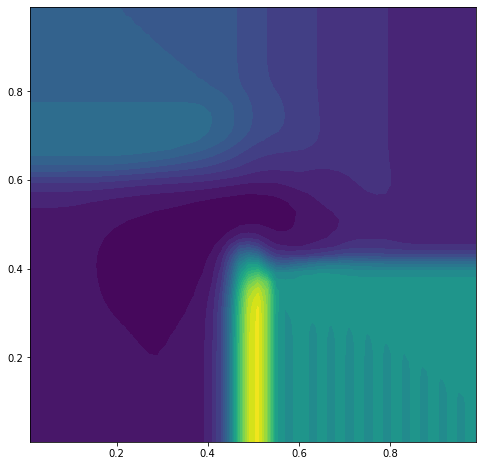

time:  0.14545454545454545


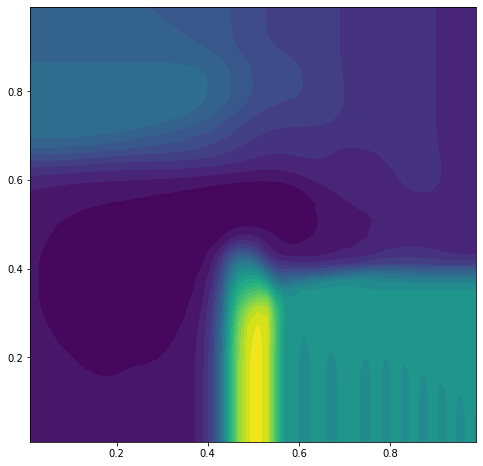

time:  0.19393939393939394


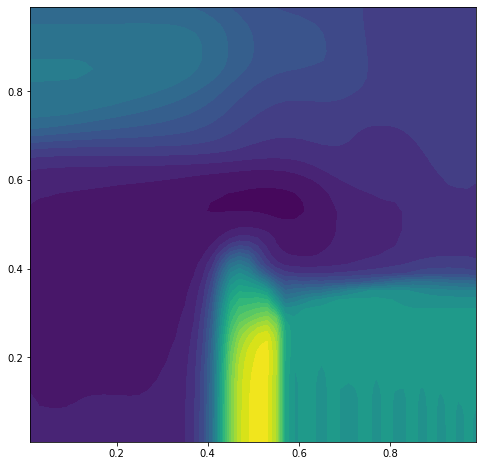

time:  0.24242424242424243


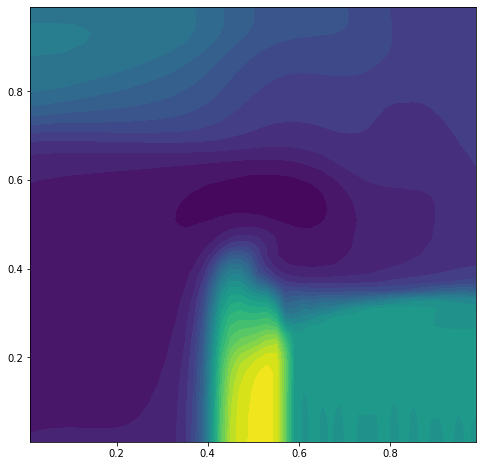

time:  0.2909090909090909
duration:  1654.9031114578247


In [8]:
cutoff = 1000 

Nx = 50
xmax = 1
x = np.linspace(0, 1, Nx+1)

Ny = 50
ymax = 1
y = np.linspace(0, 1, Ny+1)

N_t = 100
t = np.linspace(0, 0.3, N_t)
dt = t[1] - t[0]
t_stop = 0
full_sol = []

xc = 0.5*np.array(x[:-1]+x[1:])
yc = 0.5*np.array(y[:-1]+y[1:])

dx = x[1] - x[0]
dy = y[1] - y[0]

x_ax, y_ax = np.meshgrid(xc, yc)

gam = 1.4

# config 1
p1, p2, p3, p4 = 1, 0.4, 0.0439, 0.15
rho1, rho2, rho3, rho4 = 1, 0.5197, 0.1072, 0.2579
u1, u2, u3, u4 = 0, -0.7259, -0.7259, 0
v1, v2, v3, v4 = 0, 0, -1.4045, -1.4045

# config 6

p1, p2, p3, p4 = 1, 2, 3, 1
rho1, rho2, rho3, rho4 = 1, 2, 1, 3
u1, u2, u3, u4 = 0.75, 0.75, -0.75, -0.75
v1, v2, v3, v4 = -0.5, 0.5, 0.5, -0.5


x1, x2, x3, x4 = u_to_x(rho1, u1), u_to_x(rho2, u2), u_to_x(rho3, u3), u_to_x(rho4, u4)
y1, y2, y3, y4 = v_to_y(rho1, v1), v_to_y(rho2, v2), v_to_y(rho3, v3), v_to_y(rho4, v4)
e1, e2, e3, e4 = p_to_e(p1, rho1, u1, v1), p_to_e(p2, rho2, u2, v2), p_to_e(p3, rho3, u3, v3), p_to_e(p4, rho4, u4, v4)

rho0 = cid(rho1, rho2, rho3, rho4)
x0 = cid(x1, x2, x3, x4)
y0 = cid(y1, y2, y3, y4)
e0 = cid(e1, e2, e3, e4)

fig = plt.figure(figsize=(20,10)) 
ax = fig.gca(projection='3d')  
ax.plot_wireframe(x_ax, y_ax, rho0)
#ax.plot_wireframe(x_ax, y_ax, x0)
#ax.plot_wireframe(x_ax, y_ax, y0)
#ax.plot_wireframe(x_ax, y_ax, e0)
#ax.view_init(10, -45)
plt.show()

start = time.time()  

def flux(rho, x, y, e):
  f1 = x
  f2 = x**2/rho + (-1 + gam)*(e - (rho*(x**2/rho**2 + y**2/rho**2))/2.)
  f3 = (x*y)/rho
  f4 = (x*(e + (-1 + gam)*(e - (rho*(x**2/rho**2 + y**2/rho**2))/2.)))/rho
  return (f1, f2, f3, f4)

def glux(rho, x, y, e):
  f1 = y
  f2 = (x*y)/rho
  f3 = y**2/rho + (-1 + gam)*(e - (rho*(x**2/rho**2 + y**2/rho**2))/2.)
  f4 = (y*(e + (-1 + gam)*(e - (rho*(x**2/rho**2 + y**2/rho**2))/2.)))/rho
  return (f1, f2, f3, f4)

def minmod(a, b, c):
  th = 1
  maximum = np.maximum(th*a, np.maximum(b, th*c))
  minimum = np.minimum(th*a, np.minimum(b, th*c))
  hs_pos = np.heaviside(a, 1)*np.heaviside(b, 1)*np.heaviside(c, 1)
  hs_neg = np.heaviside(-a, 1)*np.heaviside(-b, 1)*np.heaviside(-c, 1)
  return minimum*hs_pos + maximum*hs_neg

def construct_uR_uL(u):
  ul_bnd = u[:,0] #- (u[:,1] - u[:,0]) #3*u[:,0] - 3*u[:,1] + u[:,2]
  ur_bnd = u[:,-1] #+ (u[:,-1] - u[:,-2]) #3*u[:,-1] - 3*u[:,-2] + u[:,-3] 

  u = np.concatenate((np.array([ul_bnd]).T, np.concatenate((u, np.array([ur_bnd]).T), axis=1)), axis=1)

  ut_bnd = u[0,:] #- (u[1,:] - u[0,:]) #3*u[0,:] - 3*u[1,:] + u[2,:]
  ub_bnd = u[-1,:] #+ (u[-1,:] - u[-2,:]) #3*u[-1,:] - 3*u[-2,:] + u[-3,:] 

  u = np.concatenate((np.array([ut_bnd]), np.concatenate((u, np.array([ub_bnd])), axis=0)), axis=0)

  xlimiter = minmod((u[1:-1, 1:-1] - u[1:-1,:-2])/dx, (u[1:-1,2:] - u[1:-1,:-2])/(2*dx), (u[1:-1,2:] - u[1:-1,1:-1])/dx)
  uxLForw = u[1:-1, 0] + (u[1:-1,1] - u[1:-1,0])/2
  uxLCent = u[1:-1, 1:-1] + dx/2*xlimiter
  uxL = np.concatenate((np.array([uxLForw]).T, uxLCent), axis=1)
  
  uxRBack = u[1:-1,-1] - (u[1:-1,-1] - u[1:-1,-2])/2
  uxRCent = u[1:-1,1:-1] - dx/2*xlimiter
  uxR = np.concatenate((uxRCent, np.array([uxRBack]).T), axis=1)

  ylimiter = minmod((u[1:-1,1:-1] - u[:-2,1:-1])/dy, (u[2:,1:-1] - u[:-2,1:-1])/(2*dy), (u[2:,1:-1] - u[1:-1,1:-1])/dy)
  uyLForw = u[0,1:-1] + (u[1,1:-1] - u[0,1:-1])/2
  uyLCent = u[1:-1,1:-1] + dy/2*ylimiter
  uyL = np.concatenate((np.array([uyLForw]), uyLCent), axis=0)

  uyRBack = u[-1,1:-1] - (u[-1,1:-1] - u[-2,1:-1])/2
  uyRCent = u[1:-1,1:-1] - dy/2*ylimiter
  uyR = np.concatenate((uyRCent, np.array([uyRBack])), axis=0)
  #print(u.shape, uxL.shape, uxR.shape, uyL.shape, uyR.shape)
  return (u, uxL, uxR, uyL, uyR)

def f_interf(rhoL, xL, yL, eL, rhoR, xR, yR, eR, xprop):
  fluxL, fluxR = flux(rhoL, xL, yL, eL), flux(rhoR, xR, yR, eR)
  flux_avg0 = (fluxL[0] + fluxR[0])/2
  flux_avg1 = (fluxL[1] + fluxR[1])/2
  flux_avg2 = (fluxL[2] + fluxR[2])/2
  flux_avg3 = (fluxL[3] + fluxR[3])/2
  return (flux_avg0 - xprop/2*(rhoR - rhoL), flux_avg1 - xprop/2*(xR - xL),
          flux_avg2 - xprop/2*(yR - yL), flux_avg3 - xprop/2*(eR - eL))

def g_interf(rhoL, xL, yL, eL, rhoR, xR, yR, eR, yprop):
  fluxL, fluxR = glux(rhoL, xL, yL, eL), glux(rhoR, xR, yR, eR)
  flux_avg0 = (fluxL[0] + fluxR[0])/2
  flux_avg1 = (fluxL[1] + fluxR[1])/2
  flux_avg2 = (fluxL[2] + fluxR[2])/2
  flux_avg3 = (fluxL[3] + fluxR[3])/2
  return (flux_avg0 - yprop/2*(rhoR - rhoL), flux_avg1 - yprop/2*(xR - xL),
          flux_avg2 - yprop/2*(yR - yL), flux_avg3 - yprop/2*(eR - eL))

def dudt(u, t):
  global t_stop
  rho, x, y, e = u[:int(len(u)/4)], u[int(len(u)/4):int(len(u)/2)], u[int(len(u)/2):int(len(u)*3/4)], u[int(len(u)*3/4):]

  rho, x, y, e = rho.reshape(-1, Nx), x.reshape(-1, Nx), y.reshape(-1, Nx), e.reshape(-1, Nx)
  
  rho, rhoL, rhoR, rhoT, rhoB = construct_uR_uL(rho)
  x, xL, xR, xT, xB = construct_uR_uL(x)
  y, yL, yR, yT, yB = construct_uR_uL(y)
  e, eL, eR, eT, eB = construct_uR_uL(e)

  FL_d = spectral_radius_f(rhoL, xL, yL, eL)
  FR_d = spectral_radius_f(rhoR, xR, yR, eR)

  #! simplify this expression !
  comp = (FL_d >= FR_d).astype(int)
  xprop = comp*FL_d + (1 - comp)*FR_d
 
  FB_d = spectral_radius_g(rhoB, xB, yB, eB)
  FT_d = spectral_radius_g(rhoT, xT, yT, eT)

  comp = (FB_d >= FT_d).astype(int)
  yprop = comp*FB_d + (1 - comp)*FT_d

  # fif = flux interface, gif = glux interface
  fi = f_interf(rhoL, xL, yL, eL, rhoR, xR, yR, eR, xprop)
  rho_fif, x_fif, y_fif, e_fif = fi[0], fi[1], fi[2], fi[3]

  gi = g_interf(rhoT, xT, yT, eT, rhoB, xB, yB, eB, yprop)
  rho_gif, x_gif, y_gif, e_gif = gi[0], gi[1], gi[2], gi[3]

  drhodt =  (rho_fif[:, :-1] - rho_fif[:, 1:])/dx + (rho_gif[:-1, :] - rho_gif[1:, :])/dy
  dxdt =  (x_fif[:, :-1] - x_fif[:, 1:])/dx + (x_gif[:-1, :] - x_gif[1:, :])/dy
  dydt =  (y_fif[:, :-1] - y_fif[:, 1:])/dx + (y_gif[:-1, :] - y_gif[1:, :])/dy
  dedt =  (e_fif[:, :-1] - e_fif[:, 1:])/dx + (e_gif[:-1, :] - e_gif[1:, :])/dy

  res = np.append( np.append( np.squeeze(np.asarray(drhodt)).flatten(), np.squeeze(np.asarray(dxdt)).flatten() ), 
                  np.append( np.squeeze(np.asarray(dydt)).flatten(), np.squeeze(np.asarray(dedt)).flatten() ))

  if t > t_stop:
    print("flow time: ", t)
    t_stop += 0.005
  #print("time: ", t)
  return res
  
def solution():
    rho0_vec = np.squeeze(np.asarray(rho0)).flatten()
    x0_vec = np.squeeze(np.asarray(x0)).flatten()
    y0_vec = np.squeeze(np.asarray(y0)).flatten()
    e0_vec = np.squeeze(np.asarray(e0)).flatten()
    u0_vec = np.append(np.append(rho0_vec, x0_vec), np.append(y0_vec, e0_vec))
    return odeint(dudt, u0_vec, t, mxstep=10000, rtol= 1e-10, atol=1e-10)

def f(t, u):
    return dudt(u, t)

def solution():
    ode_order = 1
    nsteps = 20000
    ode_integrator = 'vode'#'lsoda'
    ode_method = 'bdf'#'adams'
    r_tol = 1e-13
    a_tol = 1e-13
    ode15s = ode(f)
    ode15s.set_integrator(ode_integrator, method=ode_method, order=ode_order, nsteps = nsteps, rtol=r_tol, atol=a_tol)
    rho0_vec = np.squeeze(np.asarray(rho0)).flatten()
    x0_vec = np.squeeze(np.asarray(x0)).flatten()
    y0_vec = np.squeeze(np.asarray(y0)).flatten()
    e0_vec = np.squeeze(np.asarray(e0)).flatten()
    u0_vec = np.append(np.append(rho0_vec, x0_vec), np.append(y0_vec, e0_vec))
    r = ode15s.set_initial_value(u0_vec, t[0])
    full_sol.append(u0_vec)
    c = 1
    while c < N_t:
        print(ode15s.t)
        ode15s.integrate(ode15s.t+dt)
        full_sol.append(u0_vec)
        c += 1
    return ode15s

def solution2():
    rho0_vec = np.squeeze(np.asarray(rho0)).flatten()
    x0_vec = np.squeeze(np.asarray(x0)).flatten()
    y0_vec = np.squeeze(np.asarray(y0)).flatten()
    e0_vec = np.squeeze(np.asarray(e0)).flatten()
    u0_vec = np.append(np.append(rho0_vec, x0_vec), np.append(y0_vec, e0_vec))
    t_span = [t[0], t[-1]]
    sol = solve_ivp(lambda t, y: dudt(y, t), t_span, u0_vec, t_eval = t, rtol=1e-13, atol=1e-13, method='RK23')
    return sol

sol = solution2()
#s = sol.y
#s = sol[-1]
#s = sol.y.T[-1]
print((sol.y.T).shape)

for i in range(0, N_t, int(N_t/6)):
    s = sol.y.T[i]
    rho, x, y, e = s[:int(len(s)/4)], s[int(len(s)/4):int(len(s)/2)], s[int(len(s)/2):int(len(s)*3/4)], s[int(len(s)*3/4):]
    rho, x, y, e = rho.reshape(-1, Nx), x.reshape(-1, Nx), y.reshape(-1, Nx), e.reshape(-1, Nx)

    fig, ax1 = plt.subplots(nrows=1, figsize=(8,8))
    levels = MaxNLocator(nbins=24).tick_values(rho.min(), rho.max()) 
    ax1.contourf(x_ax, y_ax, rho, levels=levels)
    plt.show()
    print("time: ", t[i])
    
print("duration: ", time.time()-start)

# Second Order Scheme

In [ ]:
def eigenvalues_f(rho, x, y, e):
  """ spectral radius of matrix """ 
  ev1 = x/rho
  #print(np.min((1 - gam)*gam*(x**2+y**2 - 2*e*rho)/(2*rho**2)))
  temp = np.sqrt( (1 - gam)*gam*(x**2+y**2 - 2*e*rho)/(2*rho**2) )
  #sqrt_arg = np.heaviside(sqrt_arg, 0)*sqrt_arg
  ev2 = ev1 - temp
  ev3 = ev1 + temp
  ev_max = np.maximum(np.maximum(ev1, ev2), ev3)
  ev_min = np.minimum(np.minimum(ev1, ev2), ev3)
  return ( (ev_max > np.zeros(ev_max.shape)).astype(int)*ev_max, (ev_min < np.zeros(ev_min.shape)).astype(int)*ev_min )

def eigenvalues_g(rho, x, y, e):
  """ spectral radius of matrix """ 
  ev1 = y/rho
  #print(np.min((1 - gam)*gam*(x**2+y**2 - 2*e*rho)/(2*rho**2)))
  temp = np.sqrt( (1 - gam)*gam*(x**2+y**2 - 2*e*rho)/(2*rho**2) )
  #sqrt_arg = np.heaviside(sqrt_arg, 0)*sqrt_arg
  ev2 = ev1 - temp
  ev3 = ev1 + temp
  ev_max = np.maximum(np.maximum(ev1, ev2), ev3)
  ev_min = np.minimum(np.minimum(ev1, ev2), ev3)
  return ( (ev_max > np.zeros(ev_max.shape)).astype(int)*ev_max, (ev_min < np.zeros(ev_min.shape)).astype(int)*ev_min )

def cid(arg1, arg2, arg3, arg4):
  """ create init data """
  return (arg1*np.heaviside(x_ax - 0.5, 0)*np.heaviside(y_ax - 0.5, 0)
   + arg2*(1 - np.heaviside(x_ax - 0.5, 0))*np.heaviside(y_ax - 0.5, 0)
   + arg3*(1 - np.heaviside(x_ax - 0.5, 0))*(1 - np.heaviside(y_ax - 0.5, 0))
   + arg4*np.heaviside(x_ax - 0.5, 0)*(1 - np.heaviside(y_ax - 0.5, 0)))
  
def u_to_x(rho, u):
  return rho*u

def v_to_y(rho, v):
  return rho*v

def p_to_e(p, rho, u, v):
  return p/(gam - 1) + rho/2*(u**2 + v**2)

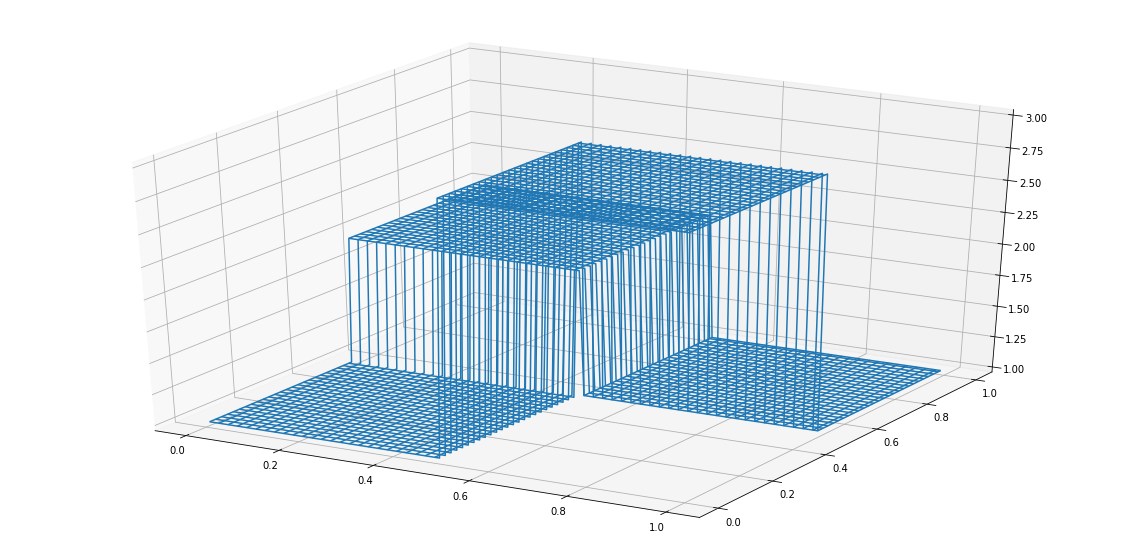

flow time:  0.0006417767169249964
flow time:  0.001005654806625492
flow time:  0.0020662756087701556
flow time:  0.0030303637938913254
flow time:  0.004004622619764525
flow time:  0.005056892130273157
flow time:  0.006004036330000535
flow time:  0.0071669963215074415
flow time:  0.008069466823734193


KeyboardInterrupt: ignored

In [ ]:
Nx = 100
xmax = 1
x = np.linspace(0, 1, Nx+1)

Ny = 100
ymax = 1
y = np.linspace(0, 1, Ny+1)

N_t = 100
t = np.linspace(0, 0.3, N_t)
t_stop = 0

xc = 0.5*np.array(x[:-1]+x[1:])
yc = 0.5*np.array(y[:-1]+y[1:])

dx = x[1] - x[0]
dy = y[1] - y[0]

x_ax, y_ax = np.meshgrid(xc, yc)

gam = 1.4

# config 14
p1, p2, p3, p4 = 8, 8, 2.6667, 2.6667
rho1, rho2, rho3, rho4 = 2, 1, 0.4736, 0.9474
u1, u2, u3, u4 = 0, 0, 0, 0
v1, v2, v3, v4 = -0.5606, -1.2172, 1.2172, 1.1606

# config 1
p1, p2, p3, p4 = 1, 0.4, 0.0439, 0.15
rho1, rho2, rho3, rho4 = 1, 0.5197, 0.1072, 0.2579
u1, u2, u3, u4 = 0, -0.7259, -0.7259, 0
v1, v2, v3, v4 = 0, 0, -1.4045, -1.4045

# config 6
p1, p2, p3, p4 = 1, 1, 1, 1
rho1, rho2, rho3, rho4 = 1, 2, 1, 3
u1, u2, u3, u4 = 0.75, 0.75, -0.75, -0.75
v1, v2, v3, v4 = -0.5, 0.5, 0.5, -0.5

x1, x2, x3, x4 = u_to_x(rho1, u1), u_to_x(rho2, u2), u_to_x(rho3, u3), u_to_x(rho4, u4)
y1, y2, y3, y4 = v_to_y(rho1, v1), v_to_y(rho2, v2), v_to_y(rho3, v3), v_to_y(rho4, v4)
e1, e2, e3, e4 = p_to_e(p1, rho1, u1, v1), p_to_e(p2, rho2, u2, v2), p_to_e(p3, rho3, u3, v3), p_to_e(p4, rho4, u4, v4)

rho0 = cid(rho1, rho2, rho3, rho4)
x0 = cid(x1, x2, x3, x4)
y0 = cid(y1, y2, y3, y4)
e0 = cid(e1, e2, e3, e4)

fig = plt.figure(figsize=(20,10)) 
ax = fig.gca(projection='3d')  
ax.plot_wireframe(x_ax, y_ax, rho0)
plt.show()

start = time.time()  

def flux(rho, x, y, e):
  f1 = x
  arg1 = (-1 + gam)*(e - (rho*(x**2/rho**2 + y**2/rho**2))/2.)
  f2 = x**2/rho + arg1
  f3 = (x*y)/rho
  f4 = (x*(e + arg1))/rho
  return (f1, f2, f3, f4)

def glux(rho, x, y, e):
  f1 = y
  f2 = (x*y)/rho
  arg1 = (-1 + gam)*(e - (rho*(x**2/rho**2 + y**2/rho**2))/2.)
  f3 = y**2/rho + arg1
  f4 = (y*(e + arg1))/rho
  return (f1, f2, f3, f4)

def minmod(a, b, c):
  th = 1
  maximum = np.maximum(th*a, np.maximum(b, th*c))
  minimum = np.minimum(th*a, np.minimum(b, th*c))
  hs_pos = np.heaviside(a, 1)*np.heaviside(b, 1)*np.heaviside(c, 1)
  hs_neg = np.heaviside(-a, 1)*np.heaviside(-b, 1)*np.heaviside(-c, 1)
  return minimum*hs_pos + maximum*hs_neg

def construct_uR_uL(u):
  ul_bnd = u[:,0] - (u[:,1] - u[:,0]) #3*u[:,0] - 3*u[:,1] + u[:,2]
  ur_bnd = u[:,-1] + (u[:,-1] - u[:,-2]) #3*u[:,-1] - 3*u[:,-2] + u[:,-3] 

  u = np.concatenate((np.array([ul_bnd]).T, np.concatenate((u, np.array([ur_bnd]).T), axis=1)), axis=1)

  ut_bnd = u[0,:] - (u[1,:] - u[0,:]) #3*u[0,:] - 3*u[1,:] + u[2,:]
  ub_bnd = u[-1,:] + (u[-1,:] - u[-2,:]) #3*u[-1,:] - 3*u[-2,:] + u[-3,:] 

  u = np.concatenate((np.array([ut_bnd]), np.concatenate((u, np.array([ub_bnd])), axis=0)), axis=0)

  xlimiter = minmod((u[1:-1, 1:-1] - u[1:-1,:-2])/dx, (u[1:-1,2:] - u[1:-1,:-2])/(2*dx), (u[1:-1,2:] - u[1:-1,1:-1])/dx)
  uxLForw = u[1:-1, 0] + (u[1:-1,1] - u[1:-1,0])/2
  uxLCent = u[1:-1, 1:-1] + dx/2*xlimiter
  uxL = np.concatenate((np.array([uxLForw]).T, uxLCent), axis=1)
  
  uxRBack = u[1:-1,-1] - (u[1:-1,-1] - u[1:-1,-2])/2
  uxRCent = u[1:-1,1:-1] - dx/2*xlimiter
  uxR = np.concatenate((uxRCent, np.array([uxRBack]).T), axis=1)

  ylimiter = minmod((u[1:-1,1:-1] - u[:-2,1:-1])/dy, (u[2:,1:-1] - u[:-2,1:-1])/(2*dy), (u[2:,1:-1] - u[1:-1,1:-1])/dy)
  uyLForw = u[0,1:-1] + (u[1,1:-1] - u[0,1:-1])/2
  uyLCent = u[1:-1,1:-1] + dy/2*ylimiter
  uyL = np.concatenate((np.array([uyLForw]), uyLCent), axis=0)

  uyRBack = u[-1,1:-1] - (u[-1,1:-1] - u[-2,1:-1])/2
  uyRCent = u[1:-1,1:-1] - dy/2*ylimiter
  uyR = np.concatenate((uyRCent, np.array([uyRBack])), axis=0)
  return (u, uxL, uxR, uyL, uyR)

def f_interf(rhoL, xL, yL, eL, rhoR, xR, yR, eR, a_plus, a_minus):
  fluxL, fluxR = flux(rhoL, xL, yL, eL), flux(rhoR, xR, yR, eR)
  den = (a_plus - a_minus)
  pre_fac = a_plus*a_minus/den
  rho = (a_plus*fluxL[0] - a_minus*fluxR[0])/den + pre_fac*(rhoR - rhoL)
  x = (a_plus*fluxL[1] - a_minus*fluxR[1])/den + pre_fac*(xR - xL)
  y = (a_plus*fluxL[2] - a_minus*fluxR[2])/den + pre_fac*(yR - yL)
  e = (a_plus*fluxL[3] - a_minus*fluxR[3])/den + pre_fac*(eR - eL)
  return (rho, x, y, e)

def g_interf(rhoL, xL, yL, eL, rhoR, xR, yR, eR, a_plus, a_minus):
  fluxL, fluxR = glux(rhoL, xL, yL, eL), glux(rhoR, xR, yR, eR)
  den = (a_plus - a_minus)
  pre_fac = a_plus*a_minus/den
  rho = (a_plus*fluxL[0] - a_minus*fluxR[0])/den + pre_fac*(rhoR - rhoL)
  x = (a_plus*fluxL[1] - a_minus*fluxR[1])/den + pre_fac*(xR - xL)
  y = (a_plus*fluxL[2] - a_minus*fluxR[2])/den + pre_fac*(yR - yL)
  e = (a_plus*fluxL[3] - a_minus*fluxR[3])/den + pre_fac*(eR - eL)
  return (rho, x, y, e)

def dudt(u, t):
  global t_stop
  rho, x, y, e = u[:int(len(u)/4)], u[int(len(u)/4):int(len(u)/2)], u[int(len(u)/2):int(len(u)*3/4)], u[int(len(u)*3/4):]

  rho, x, y, e = rho.reshape(-1, Nx), x.reshape(-1, Nx), y.reshape(-1, Nx), e.reshape(-1, Nx)
  
  rho, rhoL, rhoR, rhoT, rhoB = construct_uR_uL(rho)
  x, xL, xR, xT, xB = construct_uR_uL(x)
  y, yL, yR, yT, yB = construct_uR_uL(y)
  e, eL, eR, eT, eB = construct_uR_uL(e)

  evL_max, evL_min = eigenvalues_f(rhoL, xL, yL, eL)
  evR_max, evR_min = eigenvalues_f(rhoR, xR, yR, eR)

  comp = (evL_max >= evR_max).astype(int)
  a_plus = comp*evL_max + (1 - comp)*evR_max

  comp = (evL_min < evR_min).astype(int)
  a_minus = comp*evL_min + (1 - comp)*evR_min
 
  evT_max, evT_min = eigenvalues_g(rhoT, xT, yT, eT)
  evB_max, evB_min = eigenvalues_g(rhoB, xB, yB, eB)

  comp = (evT_max >= evB_max).astype(int)
  b_plus = comp*evT_max + (1 - comp)*evB_max

  comp = (evB_min < evT_min).astype(int)
  b_minus = comp*evB_min + (1 - comp)*evT_min

  # fif = flux interface, gif = glux interface
  fi = f_interf(rhoL, xL, yL, eL, rhoR, xR, yR, eR, a_plus, a_minus)
  rho_fif, x_fif, y_fif, e_fif = fi[0], fi[1], fi[2], fi[3]

  # B = T??
  gi = g_interf(rhoT, xT, yT, eT, rhoB, xB, yB, eB, b_plus, b_minus)
  rho_gif, x_gif, y_gif, e_gif = gi[0], gi[1], gi[2], gi[3]

  drhodt =  (rho_fif[:, :-1] - rho_fif[:, 1:])/dx + (rho_gif[:-1, :] - rho_gif[1:, :])/dy
  dxdt =  (x_fif[:, :-1] - x_fif[:, 1:])/dx + (x_gif[:-1, :] - x_gif[1:, :])/dy
  dydt =  (y_fif[:, :-1] - y_fif[:, 1:])/dx + (y_gif[:-1, :] - y_gif[1:, :])/dy
  dedt =  (e_fif[:, :-1] - e_fif[:, 1:])/dx + (e_gif[:-1, :] - e_gif[1:, :])/dy

  res = np.append( np.append( np.squeeze(np.asarray(drhodt)).flatten(), np.squeeze(np.asarray(dxdt)).flatten() ), 
                  np.append( np.squeeze(np.asarray(dydt)).flatten(), np.squeeze(np.asarray(dedt)).flatten() ))

  #print(res)
  if t > t_stop:
    print("flow time: ", t)
    t_stop += 0.001
  #print("time: ", t)
  return res
  
def solution():
    rho0_vec = np.squeeze(np.asarray(rho0)).flatten()
    x0_vec = np.squeeze(np.asarray(x0)).flatten()
    y0_vec = np.squeeze(np.asarray(y0)).flatten()
    e0_vec = np.squeeze(np.asarray(e0)).flatten()
    u0_vec = np.append(np.append(rho0_vec, x0_vec), np.append(y0_vec, e0_vec))
    return odeint(dudt, u0_vec, t, mxstep=10000, rtol= 1e-10, atol=1e-10)

def solution2():
    rho0_vec = np.squeeze(np.asarray(rho0)).flatten()
    x0_vec = np.squeeze(np.asarray(x0)).flatten()
    y0_vec = np.squeeze(np.asarray(y0)).flatten()
    e0_vec = np.squeeze(np.asarray(e0)).flatten()
    u0_vec = np.append(np.append(rho0_vec, x0_vec), np.append(y0_vec, e0_vec))
    t_span = [t[0], t[-1]]
    sol = solve_ivp(lambda t, y: dudt(y, t), t_span, u0_vec, t_eval = t, rtol=1e-10, atol=1e-10)
    return sol

sol = solution2()
#s = sol[-1]
s = sol.y.T[-1]

rho, x, y, e = s[:int(len(s)/4)], s[int(len(s)/4):int(len(s)/2)], s[int(len(s)/2):int(len(s)*3/4)], s[int(len(s)*3/4):]
rho, x, y, e = rho.reshape(-1, Nx), x.reshape(-1, Nx), y.reshape(-1, Nx), e.reshape(-1, Nx)

print(time.time()-start)

fig = plt.figure(figsize=(20,10)) 
ax = fig.gca(projection='3d')  
ax.plot_wireframe(x_ax, y_ax, rho)
ax.view_init(30, 45)
plt.show()

fig, ax1 = plt.subplots(nrows=1, figsize=(8,8))
levels = MaxNLocator(nbins=24).tick_values(rho.min(), rho.max()) 
ax1.contourf(x_ax, y_ax, rho, levels=levels)
plt.show()
    
#print(sol[-1])

# Genuine two-dimensional second order scheme

In [ ]:
def eigenvalues_f(rho, x, y, e):
  """ spectral radius of matrix """ 
  ev1 = x/rho
  #print(np.min((1 - gam)*gam*(x**2+y**2 - 2*e*rho)/(2*rho**2)))
  temp = np.sqrt( (1 - gam)*gam*(x**2+y**2 - 2*e*rho)/(2*rho**2) )
  #sqrt_arg = np.heaviside(sqrt_arg, 0)*sqrt_arg
  ev2 = ev1 - temp
  ev3 = ev1 + temp
  ev_max = np.maximum(np.maximum(ev1, ev2), ev3)
  ev_min = np.minimum(np.minimum(ev1, ev2), ev3)
  return ( (ev_max > np.zeros(ev_max.shape)).astype(int)*ev_max, (ev_min < np.zeros(ev_min.shape)).astype(int)*ev_min )

def eigenvalues_g(rho, x, y, e):
  """ spectral radius of matrix """ 
  ev1 = y/rho
  #print(np.min((1 - gam)*gam*(x**2+y**2 - 2*e*rho)/(2*rho**2)))
  temp = np.sqrt( (1 - gam)*gam*(x**2+y**2 - 2*e*rho)/(2*rho**2) )
  #sqrt_arg = np.heaviside(sqrt_arg, 0)*sqrt_arg
  ev2 = ev1 - temp
  ev3 = ev1 + temp
  ev_max = np.maximum(np.maximum(ev1, ev2), ev3)
  ev_min = np.minimum(np.minimum(ev1, ev2), ev3)
  return ( (ev_max > np.zeros(ev_max.shape)).astype(int)*ev_max, (ev_min < np.zeros(ev_min.shape)).astype(int)*ev_min )

def cid(arg1, arg2, arg3, arg4):
  """ create init data """
  return (arg1*np.heaviside(x_ax - 0.5, 0)*np.heaviside(y_ax - 0.5, 0)
   + arg2*(1 - np.heaviside(x_ax - 0.5, 0))*np.heaviside(y_ax - 0.5, 0)
   + arg3*(1 - np.heaviside(x_ax - 0.5, 0))*(1 - np.heaviside(y_ax - 0.5, 0))
   + arg4*np.heaviside(x_ax - 0.5, 0)*(1 - np.heaviside(y_ax - 0.5, 0)))
  
def u_to_x(rho, u):
  return rho*u

def v_to_y(rho, v):
  return rho*v

def p_to_e(p, rho, u, v):
  return p/(gam - 1) + rho/2*(u**2 + v**2)

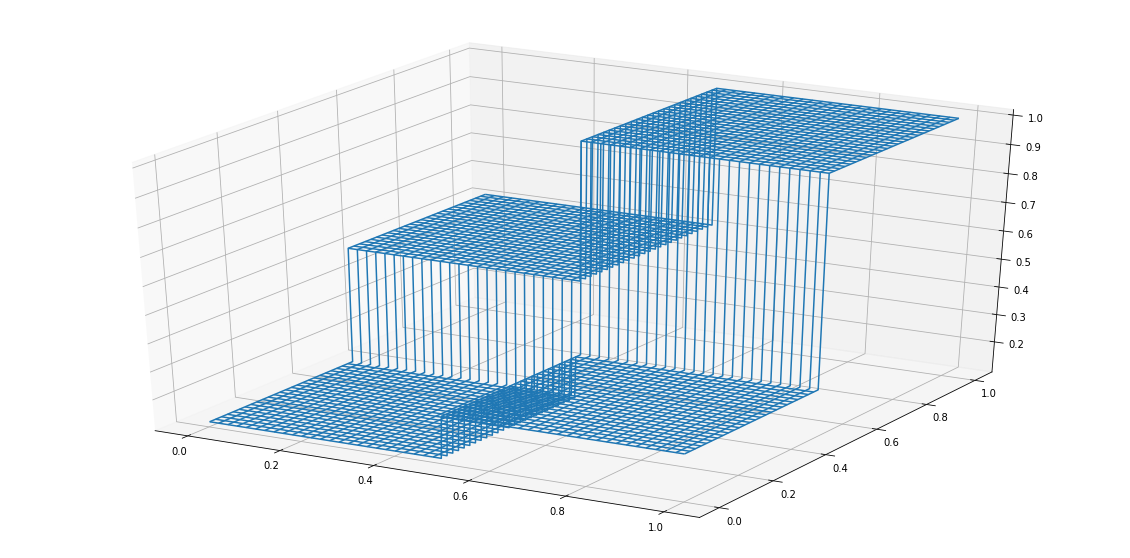

flow time:  0.00034293753628029407
flow time:  0.0010265016542811143
flow time:  0.0020001500586223206
flow time:  0.0030003328327016542
flow time:  0.0040040730754266705
flow time:  0.0050018663527632195
flow time:  0.006003425128739334
flow time:  0.007007557534384038
flow time:  0.008000525706403649
flow time:  0.009001198666408913
flow time:  0.010004010664561708
flow time:  0.011000398801046531
flow time:  0.012005298335690485
flow time:  0.013041835767730162
flow time:  0.014003849842936268
flow time:  0.015001933396105192
flow time:  0.01600411867573795
flow time:  0.017006274240134435
flow time:  0.018007707119498746
flow time:  0.019006899597088938
flow time:  0.020008455467025257
flow time:  0.02102168019772576
flow time:  0.02200538390701566
flow time:  0.023020178417915597
flow time:  0.02403886181977151
flow time:  0.025006324122258745
flow time:  0.026008702715095647
flow time:  0.02702662176739645
flow time:  0.028015048555541718
flow time:  0.029012802407851947
flow tim

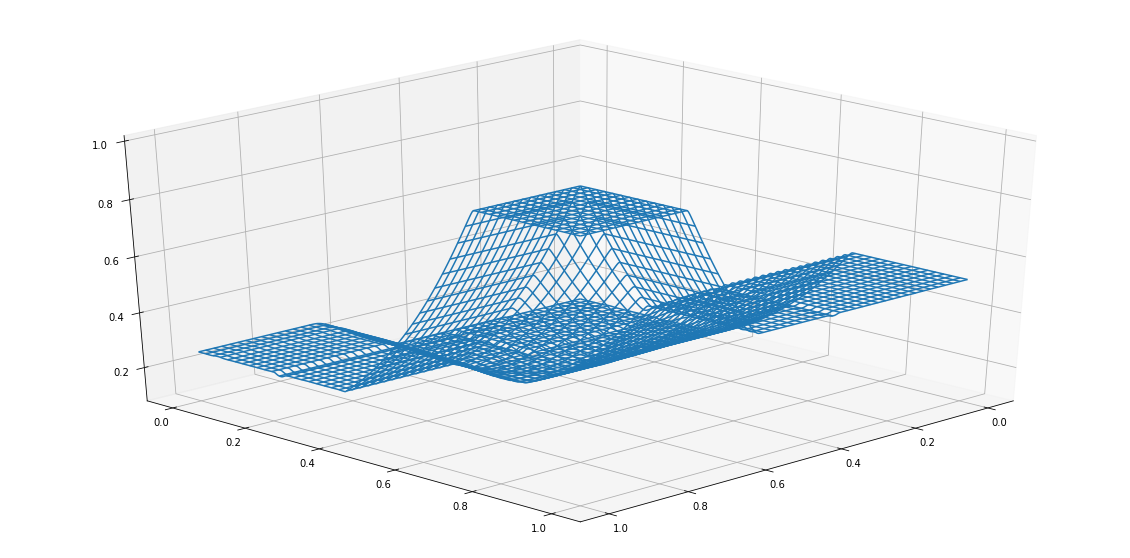

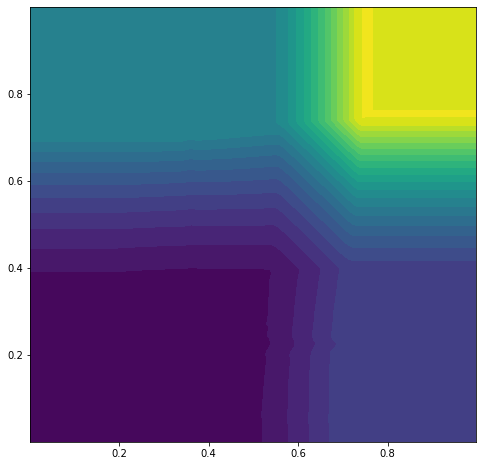

In [ ]:
Nx = 400
xmax = 1
x = np.linspace(0, 1, Nx+1)

Ny = 400
ymax = 1
y = np.linspace(0, 1, Ny+1)

N_t = 100
t = np.linspace(0, 0.2, N_t)
t_stop = 0

xc = 0.5*np.array(x[:-1]+x[1:])
yc = 0.5*np.array(y[:-1]+y[1:])

dx = x[1] - x[0]
dy = y[1] - y[0]

x_ax, y_ax = np.meshgrid(xc, yc)

gam = 1.4

# config 14
p1, p2, p3, p4 = 8, 8, 2.6667, 2.6667
rho1, rho2, rho3, rho4 = 2, 1, 0.4736, 0.9474
u1, u2, u3, u4 = 0, 0, 0, 0
v1, v2, v3, v4 = -0.5606, -1.2172, 1.2172, 1.1606


# config 6
p1, p2, p3, p4 = 1, 1, 1, 1
rho1, rho2, rho3, rho4 = 1, 2, 1, 3
u1, u2, u3, u4 = 0.75, 0.75, -0.75, -0.75
v1, v2, v3, v4 = -0.5, 0.5, 0.5, -0.5

# config 1
p1, p2, p3, p4 = 1, 0.4, 0.0439, 0.15
rho1, rho2, rho3, rho4 = 1, 0.5197, 0.1072, 0.2579
u1, u2, u3, u4 = 0, -0.7259, -0.7259, 0
v1, v2, v3, v4 = 0, 0, -1.4045, -1.4045

x1, x2, x3, x4 = u_to_x(rho1, u1), u_to_x(rho2, u2), u_to_x(rho3, u3), u_to_x(rho4, u4)
y1, y2, y3, y4 = v_to_y(rho1, v1), v_to_y(rho2, v2), v_to_y(rho3, v3), v_to_y(rho4, v4)
e1, e2, e3, e4 = p_to_e(p1, rho1, u1, v1), p_to_e(p2, rho2, u2, v2), p_to_e(p3, rho3, u3, v3), p_to_e(p4, rho4, u4, v4)

rho0 = cid(rho1, rho2, rho3, rho4)
x0 = cid(x1, x2, x3, x4)
y0 = cid(y1, y2, y3, y4)
e0 = cid(e1, e2, e3, e4)

fig = plt.figure(figsize=(20,10)) 
ax = fig.gca(projection='3d')  
ax.plot_wireframe(x_ax, y_ax, rho0)
plt.show()

start = time.time()  

def flux(rho, x, y, e):
  f1 = x
  arg1 = (-1 + gam)*(e - (rho*(x**2/rho**2 + y**2/rho**2))/2.)
  f2 = x**2/rho + arg1
  f3 = (x*y)/rho
  f4 = (x*(e + arg1))/rho
  return (f1, f2, f3, f4)

def glux(rho, x, y, e):
  f1 = y
  f2 = (x*y)/rho
  arg1 = (-1 + gam)*(e - (rho*(x**2/rho**2 + y**2/rho**2))/2.)
  f3 = y**2/rho + arg1
  f4 = (y*(e + arg1))/rho
  return (f1, f2, f3, f4)

def minmod(a, b, c):
  th = 2
  maximum = np.maximum(th*a, np.maximum(b, th*c))
  minimum = np.minimum(th*a, np.minimum(b, th*c))
  hs_pos = np.heaviside(a, 1)*np.heaviside(b, 1)*np.heaviside(c, 1)
  hs_neg = np.heaviside(-a, 1)*np.heaviside(-b, 1)*np.heaviside(-c, 1)
  return minimum*hs_pos + maximum*hs_neg

def construct_boundaries(u):
  ul_bnd = u[:,0]- (u[:,1] - u[:,0]) 
  ur_bnd = u[:,-1] + (u[:,-1] - u[:,-2]) 

  u = np.concatenate((np.array([ul_bnd]).T, np.concatenate((u, np.array([ur_bnd]).T), axis=1)), axis=1)

  ut_bnd = u[0,:]- (u[1,:] - u[0,:]) #3*u[0,:] - 3*u[1,:] + u[2,:]
  ub_bnd = u[-1,:]+ (u[-1,:] - u[-2,:]) #3*u[-1,:] - 3*u[-2,:] + u[-3,:] 

  u = np.concatenate((np.array([ut_bnd]), np.concatenate((u, np.array([ub_bnd])), axis=0)), axis=0)
  return u

def construct_u(u):
  xlimiter = minmod((u[1:-1, 1:-1] - u[1:-1,:-2])/dx, (u[1:-1,2:] - u[1:-1,:-2])/(2*dx), (u[1:-1,2:] - u[1:-1,1:-1])/dx)
  uE = u[1:-1,1:-1] + dx/2*xlimiter
  uW = u[1:-1,1:-1] - dx/2*xlimiter

  ylimiter = minmod((u[1:-1,1:-1] - u[:-2,1:-1])/dy, (u[2:,1:-1] - u[:-2,1:-1])/(2*dy), (u[2:,1:-1] - u[1:-1,1:-1])/dy) 
  uN = u[1:-1,1:-1] + dy/2*ylimiter
  uS = u[1:-1,1:-1] - dy/2*ylimiter

  uNE = uE + dy/2*ylimiter
  uNW = uW + dy/2*ylimiter
  uSE = uE - dy/2*ylimiter
  uSW = uW - dy/2*ylimiter 
  return (u[1:-1,1:-1], uE, uW, uN, uS, uNE, uNW, uSE, uSW)

def f_interf(rhoNE, rhoNW, rhoSE, rhoSW, xNE, xNW, xSE, xSW, yNE, yNW, ySE, ySW, eNE, eNW, eSE, eSW, a_plus, a_minus):
  fluxNE, fluxNW = flux(rhoNE, xNE, yNE, eNE), flux(rhoNW, xNW, yNW, eNW)
  fluxSE, fluxSW = flux(rhoSE, xSE, ySE, eSE), flux(rhoSW, xSW, ySW, eSW)
  den = 2*(a_plus - a_minus)
  pre_fac = a_plus*a_minus/den
  rho = a_plus*(fluxNE[0] + fluxSE[0])/den - a_minus*(fluxNW[0] + fluxSW[0])/den + pre_fac*(rhoNW - rhoNE + rhoSW - rhoSE)
  x = a_plus*(fluxNE[1] + fluxSE[1])/den - a_minus*(fluxNW[1] + fluxSW[1])/den + pre_fac*(xNW - xNE + xSW - xSE)
  y = a_plus*(fluxNE[2] + fluxSE[2])/den - a_minus*(fluxNW[2] + fluxSW[2])/den + pre_fac*(yNW - yNE + ySW - ySE)
  e = a_plus*(fluxNE[3] + fluxSE[3])/den - a_minus*(fluxNW[3] + fluxSW[3])/den + pre_fac*(eNW - eNE + eSW - eSE)
  return (rho, x, y, e)

def g_interf(rhoNE, rhoNW, rhoSE, rhoSW, xNE, xNW, xSE, xSW, yNE, yNW, ySE, ySW, eNE, eNW, eSE, eSW, a_plus, a_minus):
  fluxNE, fluxNW = glux(rhoNE, xNE, yNE, eNE), glux(rhoNW, xNW, yNW, eNW)
  fluxSE, fluxSW = glux(rhoSE, xSE, ySE, eSE), glux(rhoSW, xSW, ySW, eSW)
  den = 2*(a_plus - a_minus)
  pre_fac = a_plus*a_minus/den
  rho = a_plus*(fluxNW[0] + fluxNE[0])/den - a_minus*(fluxSW[0] + fluxSE[0])/den + pre_fac*(rhoSW - rhoNW + rhoSE - rhoNE)
  x = a_plus*(fluxNW[1] + fluxNE[1])/den - a_minus*(fluxSW[1] + fluxSE[1])/den + pre_fac*(xSW - xNW + xSE - xNE)
  y = a_plus*(fluxNW[2] + fluxNE[2])/den - a_minus*(fluxSW[2] + fluxSE[2])/den + pre_fac*(ySW - yNW + ySE - yNE)
  e = a_plus*(fluxNW[3] + fluxNE[3])/den - a_minus*(fluxSW[3] + fluxSE[3])/den + pre_fac*(eSW - eNW + eSE - eNE)
  return (rho, x, y, e)

def dudt(u, t):
  global t_stop
  rho, x, y, e = u[:int(len(u)/4)], u[int(len(u)/4):int(len(u)/2)], u[int(len(u)/2):int(len(u)*3/4)], u[int(len(u)*3/4):]
  rho, x, y, e = rho.reshape(-1, Nx), x.reshape(-1, Nx), y.reshape(-1, Nx), e.reshape(-1, Nx)
  rho, x, y, e = construct_boundaries(construct_boundaries(rho)), construct_boundaries(construct_boundaries(x))\
                ,construct_boundaries(construct_boundaries(y)), construct_boundaries(construct_boundaries(e))
  
  rho, rhoE, rhoW, rhoN, rhoS, rhoNE, rhoNW, rhoSE, rhoSW = construct_u(rho)
  x, xE, xW, xN, xS, xNE, xNW, xSE, xSW = construct_u(x)
  y, yE, yW, yN, yS, yNE, yNW, ySE, ySW = construct_u(y)
  e, eE, eW, eN, eS, eNE, eNW, eSE, eSW = construct_u(e)

  evL_max, evL_min = eigenvalues_f(rhoW[:,1:], xW[:,1:], yW[:,1:], eW[:,1:])
  evR_max, evR_min = eigenvalues_f(rhoE[:,:-1], xE[:,:-1], yE[:,:-1], eE[:,:-1])

  comp = (evL_max >= evR_max).astype(int)
  a_plus = comp*evL_max + (1 - comp)*evR_max

  comp = (evL_min < evR_min).astype(int)
  a_minus = comp*evL_min + (1 - comp)*evR_min
 
  evT_max, evT_min = eigenvalues_g(rhoN[:-1,:], xN[:-1,:], yN[:-1,:], eN[:-1,:])
  evB_max, evB_min = eigenvalues_g(rhoS[1:,:], xS[1:,:], yS[1:,:], eS[1:,:])

  comp = (evT_max >= evB_max).astype(int)
  b_plus = comp*evT_max + (1 - comp)*evB_max

  comp = (evB_min < evT_min).astype(int)
  b_minus = comp*evB_min + (1 - comp)*evT_min

  #print(a_plus.shape)
  #print(a_minus.shape)
  #input()
  # fif = flux interface, gif = glux interface
  fi = f_interf(rhoNE[:,:-1], rhoNW[:,1:], rhoSE[:,:-1], rhoSW[:,1:], xNE[:,:-1], xNW[:,1:], xSE[:,:-1], xSW[:,1:],\
                yNE[:,1:], yNW[:,1:], ySE[:,:-1], ySW[:,1:], eNE[:,:-1], eNW[:,1:], eSE[:,:-1], eSW[:,1:], a_plus, a_minus)
  rho_fif, x_fif, y_fif, e_fif = fi

  gi = g_interf(rhoNE[:-1,:], rhoNW[:-1,:], rhoSE[1:,:], rhoSW[1:,:], xNE[:-1,:], xNW[:-1,:], xSE[1:,:], xSW[1:,:],\
                yNE[:-1,:], yNW[:-1,:], ySE[1:,:], ySW[1:,:], eNE[:-1,:], eNW[:-1,:], eSE[1:,:], eSW[1:,:], b_plus, b_minus)
  rho_gif, x_gif, y_gif, e_gif = gi

  drhodt =  (rho_fif[1:-1, :-1] - rho_fif[1:-1, 1:])/dx + (rho_gif[:-1, 1:-1] - rho_gif[1:, 1:-1])/dy
  dxdt =  (x_fif[1:-1, :-1] - x_fif[1:-1, 1:])/dx + (x_gif[:-1, 1:-1] - x_gif[1:, 1:-1])/dy
  dydt =  (y_fif[1:-1, :-1] - y_fif[1:-1, 1:])/dx + (y_gif[:-1, 1:-1] - y_gif[1:, 1:-1])/dy
  dedt =  (e_fif[1:-1, :-1] - e_fif[1:-1, 1:])/dx + (e_gif[:-1, 1:-1] - e_gif[1:, 1:-1])/dy

  res = np.append( np.append( np.squeeze(np.asarray(drhodt)).flatten(), np.squeeze(np.asarray(dxdt)).flatten() ), 
                  np.append( np.squeeze(np.asarray(dydt)).flatten(), np.squeeze(np.asarray(dedt)).flatten() ))

  #print(res)
  if t > t_stop:
    print("flow time: ", t)
    t_stop += 0.001
  #print("time: ", t)
  return res
  
def solution():
    rho0_vec = np.squeeze(np.asarray(rho0)).flatten()
    x0_vec = np.squeeze(np.asarray(x0)).flatten()
    y0_vec = np.squeeze(np.asarray(y0)).flatten()
    e0_vec = np.squeeze(np.asarray(e0)).flatten()
    u0_vec = np.append(np.append(rho0_vec, x0_vec), np.append(y0_vec, e0_vec))
    return odeint(dudt, u0_vec, t, mxstep=10000, rtol= 1e-10, atol=1e-10)

def solution2():
    rho0_vec = np.squeeze(np.asarray(rho0)).flatten()
    x0_vec = np.squeeze(np.asarray(x0)).flatten()
    y0_vec = np.squeeze(np.asarray(y0)).flatten()
    e0_vec = np.squeeze(np.asarray(e0)).flatten()
    u0_vec = np.append(np.append(rho0_vec, x0_vec), np.append(y0_vec, e0_vec))
    t_span = [t[0], t[-1]]
    sol = solve_ivp(lambda t, y: dudt(y, t), t_span, u0_vec, t_eval = t, rtol=1e-9, atol=1e-9)
    return sol

sol = solution2()
#s = sol[-1]
s = sol.y.T[-1]

rho, x, y, e = s[:int(len(s)/4)], s[int(len(s)/4):int(len(s)/2)], s[int(len(s)/2):int(len(s)*3/4)], s[int(len(s)*3/4):]
rho, x, y, e = rho.reshape(-1, Nx), x.reshape(-1, Nx), y.reshape(-1, Nx), e.reshape(-1, Nx)

print(time.time()-start)

fig = plt.figure(figsize=(20,10)) 
ax = fig.gca(projection='3d')  
ax.plot_wireframe(x_ax, y_ax, rho)
ax.view_init(30, 45)
plt.show()

fig, ax1 = plt.subplots(nrows=1, figsize=(8,8))
levels = MaxNLocator(nbins=24).tick_values(rho.min(), rho.max()) 
ax1.contourf(x_ax, y_ax, rho, levels=levels)
plt.show()
    
#print(sol[-1])

# Third Order

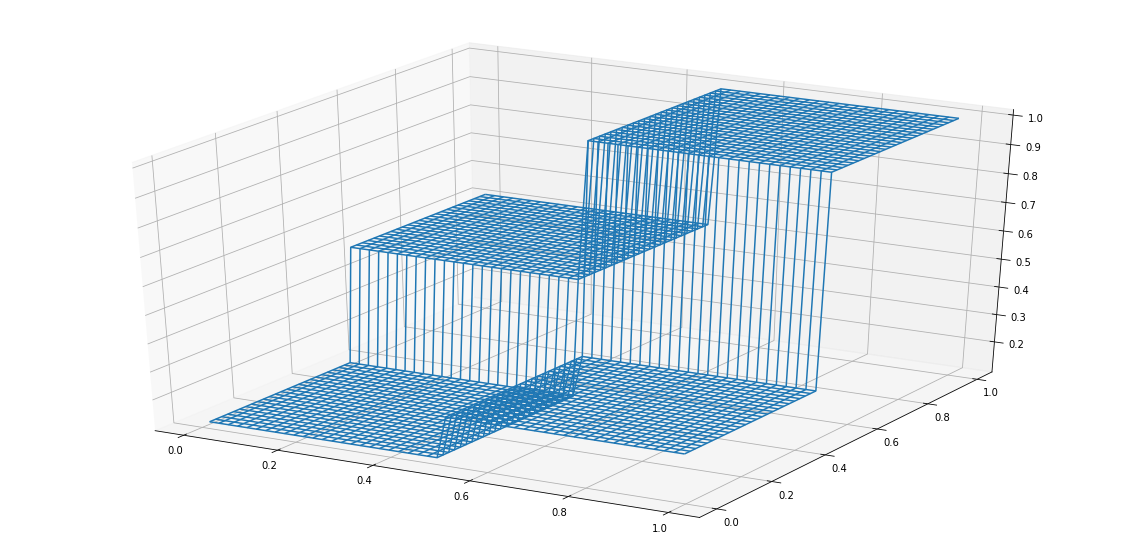

flow time:  0.0009647876348646703
flow time:  0.0010203299603583054
flow time:  0.0020108550159679143
flow time:  0.0030070718865587054
flow time:  0.004075505970953035
flow time:  0.005021099956534687
flow time:  0.0060133707120877105
flow time:  0.007054651023898777
flow time:  0.008007712982616605
flow time:  0.009096222560383395
flow time:  0.010022326444818288
flow time:  0.011016250350436492
flow time:  0.012031275300496769
flow time:  0.013004127652301342
flow time:  0.014005459972762958
flow time:  0.015010722149124661
flow time:  0.016006562795002097
flow time:  0.01703967520314001
flow time:  0.018004163086899377
flow time:  0.01905564592089548
flow time:  0.020102049585650192
flow time:  0.021009368861500056
flow time:  0.022009094833409824
flow time:  0.023040524400793055
flow time:  0.02401632244970063
flow time:  0.025113087290825835
flow time:  0.026032120884052202
flow time:  0.027001255747022723
flow time:  0.028133122806109682
flow time:  0.029048102576385168
flow tim

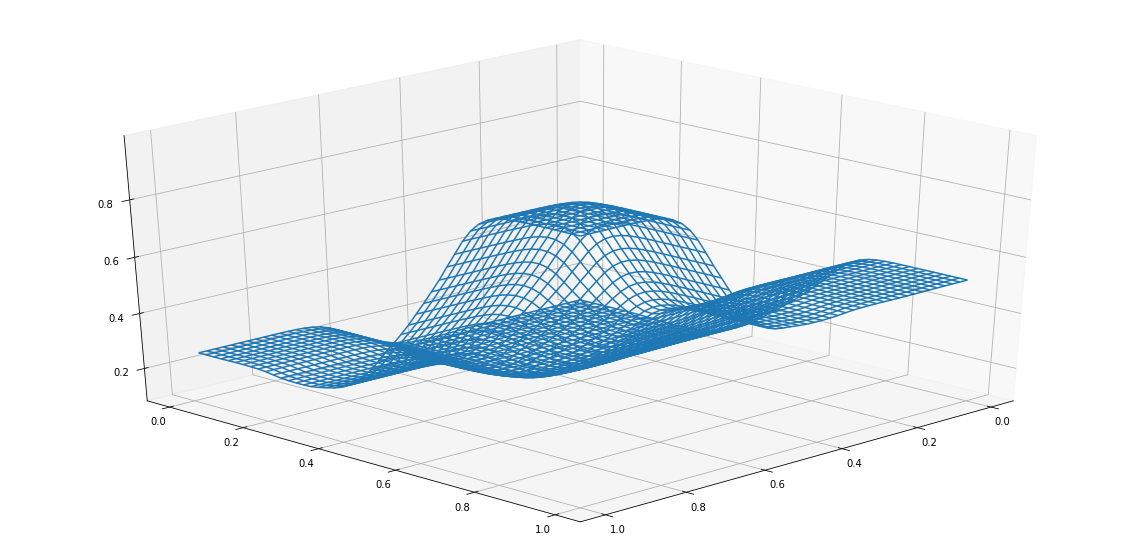

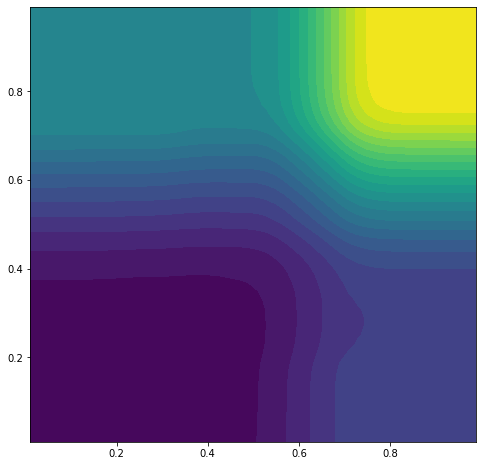

In [ ]:
Nx = 50
xmax = 1
x = np.linspace(0, 1, Nx+1)

Ny = 50
ymax = 1
y = np.linspace(0, 1, Ny+1)

N_t = 100
t = np.linspace(0, 0.2, N_t)
t_stop = 0

xc = 0.5*np.array(x[:-1]+x[1:])
yc = 0.5*np.array(y[:-1]+y[1:])

dx = x[1] - x[0]
dy = y[1] - y[0]

x_ax, y_ax = np.meshgrid(xc, yc)

gam = 1.4

# config 14
p1, p2, p3, p4 = 8, 8, 2.6667, 2.6667
rho1, rho2, rho3, rho4 = 2, 1, 0.4736, 0.9474
u1, u2, u3, u4 = 0, 0, 0, 0
v1, v2, v3, v4 = -0.5606, -1.2172, 1.2172, 1.1606



# config 6
p1, p2, p3, p4 = 1, 1, 1, 1
rho1, rho2, rho3, rho4 = 1, 2, 1, 3
u1, u2, u3, u4 = 0.75, 0.75, -0.75, -0.75
v1, v2, v3, v4 = -0.5, 0.5, 0.5, -0.5

# config 1
p1, p2, p3, p4 = 1, 0.4, 0.0439, 0.15
rho1, rho2, rho3, rho4 = 1, 0.5197, 0.1072, 0.2579
u1, u2, u3, u4 = 0, -0.7259, -0.7259, 0
v1, v2, v3, v4 = 0, 0, -1.4045, -1.4045

x1, x2, x3, x4 = u_to_x(rho1, u1), u_to_x(rho2, u2), u_to_x(rho3, u3), u_to_x(rho4, u4)
y1, y2, y3, y4 = v_to_y(rho1, v1), v_to_y(rho2, v2), v_to_y(rho3, v3), v_to_y(rho4, v4)
e1, e2, e3, e4 = p_to_e(p1, rho1, u1, v1), p_to_e(p2, rho2, u2, v2), p_to_e(p3, rho3, u3, v3), p_to_e(p4, rho4, u4, v4)

rho0 = cid(rho1, rho2, rho3, rho4)
x0 = cid(x1, x2, x3, x4)
y0 = cid(y1, y2, y3, y4)
e0 = cid(e1, e2, e3, e4)

fig = plt.figure(figsize=(20,10)) 
ax = fig.gca(projection='3d')  
ax.plot_wireframe(x_ax, y_ax, rho0)
plt.show()

start = time.time()  

def flux(rho, x, y, e):
  f1 = x
  arg1 = (-1 + gam)*(e - (rho*(x**2/rho**2 + y**2/rho**2))/2.)
  f2 = x**2/rho + arg1
  f3 = (x*y)/rho
  f4 = (x*(e + arg1))/rho
  return (f1, f2, f3, f4)

def glux(rho, x, y, e):
  f1 = y
  f2 = (x*y)/rho
  arg1 = (-1 + gam)*(e - (rho*(x**2/rho**2 + y**2/rho**2))/2.)
  f3 = y**2/rho + arg1
  f4 = (y*(e + arg1))/rho
  return (f1, f2, f3, f4)

def minmod(a, b, c):
  th = 1
  maximum = np.maximum(th*a, np.maximum(b, th*c))
  minimum = np.minimum(th*a, np.minimum(b, th*c))
  hs_pos = np.heaviside(a, 1)*np.heaviside(b, 1)*np.heaviside(c, 1)
  hs_neg = np.heaviside(-a, 1)*np.heaviside(-b, 1)*np.heaviside(-c, 1)
  return minimum*hs_pos + maximum*hs_neg

def construct_boundaries(u):
  ul_bnd = u[:,0]- (u[:,1] - u[:,0]) 
  ur_bnd = u[:,-1] + (u[:,-1] - u[:,-2]) 

  u = np.concatenate((np.array([ul_bnd]).T, np.concatenate((u, np.array([ur_bnd]).T), axis=1)), axis=1)

  ut_bnd = u[0,:]- (u[1,:] - u[0,:]) #3*u[0,:] - 3*u[1,:] + u[2,:]
  ub_bnd = u[-1,:]+ (u[-1,:] - u[-2,:]) #3*u[-1,:] - 3*u[-2,:] + u[-3,:] 

  u = np.concatenate((np.array([ut_bnd]), np.concatenate((u, np.array([ub_bnd])), axis=0)), axis=0)
  return u

def construct_u(u):
  xlimiter = minmod((u[1:-1, 1:-1] - u[1:-1,:-2])/dx, (u[1:-1,2:] - u[1:-1,:-2])/(2*dx), (u[1:-1,2:] - u[1:-1,1:-1])/dx)
  uE = u[1:-1,1:-1] + dx/2*xlimiter
  uW = u[1:-1,1:-1] - dx/2*xlimiter

  ylimiter = minmod((u[1:-1,1:-1] - u[:-2,1:-1])/dy, (u[2:,1:-1] - u[:-2,1:-1])/(2*dy), (u[2:,1:-1] - u[1:-1,1:-1])/dy) 
  uN = u[1:-1,1:-1] + dy/2*ylimiter
  uS = u[1:-1,1:-1] - dy/2*ylimiter

  uNE = uE + dy/2*ylimiter
  uNW = uW + dy/2*ylimiter
  uSE = uE - dy/2*ylimiter
  uSW = uW - dy/2*ylimiter 
  return (u[1:-1,1:-1], uE, uW, uN, uS, uNE, uNW, uSE, uSW)


def f_interf(rhoNE, rhoNW, rhoSE, rhoSW, xNE, xNW, xSE, xSW, yNE, yNW, ySE, ySW, eNE, eNW, eSE, eSW, rhoE, rhoW, xE, xW, yE, yW, eE, eW, a_plus, a_minus):
  fluxNE, fluxNW = flux(rhoNE, xNE, yNE, eNE), flux(rhoNW, xNW, yNW, eNW)
  fluxSE, fluxSW = flux(rhoSE, xSE, ySE, eSE), flux(rhoSW, xSW, ySW, eSW)
  fluxE, fluxW = flux(rhoE, xE, yE, eE), flux(rhoW, xW, yW, eW)
  den = 6*(a_plus - a_minus)
  pre_fac = a_plus*a_minus/den
  rho = a_plus*(fluxNE[0] + 4*fluxE[0] + fluxSE[0])/den - a_minus*(fluxNW[0] + 4*fluxW[0] + fluxSW[0])/den + pre_fac*(rhoNW - rhoNE + 4*(rhoW - rhoE) + rhoSW - rhoSE)
  x = a_plus*(fluxNE[1] + 4*fluxE[1] + fluxSE[1])/den - a_minus*(fluxNW[1] + 4*fluxW[1] + fluxSW[1])/den + pre_fac*(xNW - xNE + 4*(xW - xE) + xSW - xSE)
  y = a_plus*(fluxNE[2] + 4*fluxE[2] + fluxSE[2])/den - a_minus*(fluxNW[2] + 4*fluxW[2] + fluxSW[2])/den + pre_fac*(yNW - yNE + 4*(yW - yE) + ySW - ySE)
  e = a_plus*(fluxNE[3] + 4*fluxE[3] + fluxSE[3])/den - a_minus*(fluxNW[3] + 4*fluxW[3] + fluxSW[3])/den + pre_fac*(eNW - eNE + 4*(eW - eE) + eSW - eSE)
  return (rho, x, y, e)

def g_interf(rhoNE, rhoNW, rhoSE, rhoSW, xNE, xNW, xSE, xSW, yNE, yNW, ySE, ySW, eNE, eNW, eSE, eSW, rhoN, rhoS,xN, xS,yN, yS,eN, eS, a_plus, a_minus):
  fluxNE, fluxNW = glux(rhoNE, xNE, yNE, eNE), glux(rhoNW, xNW, yNW, eNW)
  fluxSE, fluxSW = glux(rhoSE, xSE, ySE, eSE), glux(rhoSW, xSW, ySW, eSW)
  fluxN, fluxS = glux(rhoN, xN, yN, eN), glux(rhoS, xS, yS, eS)
  den = 6*(a_plus - a_minus)
  pre_fac = a_plus*a_minus/den
  rho = a_plus*(fluxNW[0] + 4*fluxN[0] + fluxNE[0])/den - a_minus*(fluxSW[0] + 4*fluxS[0] + fluxSE[0])/den + pre_fac*(rhoSW - rhoNW + 4*(rhoS - rhoN) + rhoSE - rhoNE)
  x = a_plus*(fluxNW[1] + 4*fluxN[1] + fluxNE[1])/den - a_minus*(fluxSW[1] + 4*fluxS[1] + fluxSE[1])/den + pre_fac*(xSW - xNW + 4*(xS - xN) + xSE - xNE)
  y = a_plus*(fluxNW[2] + 4*fluxN[2] + fluxNE[2])/den - a_minus*(fluxSW[2] + 4*fluxS[2] + fluxSE[2])/den + pre_fac*(ySW - yNW + 4*(yS - yN) + ySE - yNE)
  e = a_plus*(fluxNW[3] + 4*fluxN[3] + fluxNE[3])/den - a_minus*(fluxSW[3] + 4*fluxS[3] + fluxSE[3])/den + pre_fac*(eSW - eNW + 4*(eS - eN) + eSE - eNE)
  return (rho, x, y, e)

def dudt(u, t):
  global t_stop
  rho, x, y, e = u[:int(len(u)/4)], u[int(len(u)/4):int(len(u)/2)], u[int(len(u)/2):int(len(u)*3/4)], u[int(len(u)*3/4):]
  rho, x, y, e = rho.reshape(-1, Nx), x.reshape(-1, Nx), y.reshape(-1, Nx), e.reshape(-1, Nx)
  rho, x, y, e = construct_boundaries(construct_boundaries(construct_boundaries(rho))), construct_boundaries(construct_boundaries(construct_boundaries(x)))\
                ,construct_boundaries(construct_boundaries(construct_boundaries(y))), construct_boundaries(construct_boundaries(construct_boundaries(e)))
  
  rho, rhoE, rhoW, rhoN, rhoS, rhoNE, rhoNW, rhoSE, rhoSW = construct_u(rho)
  x, xE, xW, xN, xS, xNE, xNW, xSE, xSW = construct_u(x)
  y, yE, yW, yN, yS, yNE, yNW, ySE, ySW = construct_u(y)
  e, eE, eW, eN, eS, eNE, eNW, eSE, eSW = construct_u(e)

  evL_max, evL_min = eigenvalues_f(rhoW[:,2:-1], xW[:,2:-1], yW[:,2:-1], eW[:,2:-1])
  evR_max, evR_min = eigenvalues_f(rhoE[:,1:-2], xE[:,1:-2], yE[:,1:-2], eE[:,1:-2])

  comp = (evL_max >= evR_max).astype(int)
  a_plus = comp*evL_max + (1 - comp)*evR_max

  comp = (evL_min < evR_min).astype(int)
  a_minus = comp*evL_min + (1 - comp)*evR_min
 
  evT_max, evT_min = eigenvalues_g(rhoN[1:-2,:], xN[1:-2,:], yN[1:-2,:], eN[1:-2,:])
  evB_max, evB_min = eigenvalues_g(rhoS[2:-1,:], xS[2:-1,:], yS[2:-1,:], eS[2:-1,:])

  comp = (evT_max >= evB_max).astype(int)
  b_plus = comp*evT_max + (1 - comp)*evB_max

  comp = (evB_min < evT_min).astype(int)
  b_minus = comp*evB_min + (1 - comp)*evT_min

  #print(a_plus.shape)
  #print(a_minus.shape)
  #input()
  # fif = flux interface, gif = glux interface
  fi = f_interf(rhoNE[:,1:-2], rhoNW[:,2:-1], rhoSE[:,1:-2], rhoSW[:,2:-1], xNE[:,1:-2], xNW[:,2:-1], xSE[:,1:-2], xSW[:,2:-1],\
                yNE[:,1:-2], yNW[:,2:-1], ySE[:,1:-2], ySW[:,2:-1], eNE[:,1:-2], eNW[:,2:-1], eSE[:,1:-2], eSW[:,2:-1], \
                rhoE[:,1:-2], rhoW[:,2:-1], xE[:,1:-2], xW[:,2:-1], yE[:,1:-2], yW[:,2:-1], eE[:,1:-2], eW[:,2:-1], a_plus, a_minus)
  rho_fif, x_fif, y_fif, e_fif = fi[0], fi[1], fi[2], fi[3]

  gi = g_interf(rhoNE[1:-2,:], rhoNW[1:-2,:], rhoSE[2:-1,:], rhoSW[2:-1,:], xNE[1:-2,:], xNW[1:-2,:], xSE[2:-1,:], xSW[2:-1,:],\
                yNE[1:-2,:], yNW[1:-2,:], ySE[2:-1,:], ySW[2:-1,:], eNE[1:-2,:], eNW[1:-2,:], eSE[2:-1,:], eSW[2:-1,:], \
                rhoN[1:-2,:], rhoS[2:-1,:],xN[1:-2,:], xS[2:-1,:],yN[1:-2,:], yS[2:-1,:],eN[1:-2,:], eS[2:-1,:],b_plus, b_minus)
  rho_gif, x_gif, y_gif, e_gif = gi[0], gi[1], gi[2], gi[3]

  drhodt =  (rho_fif[2:-2, :-1] - rho_fif[2:-2, 1:])/dx + (rho_gif[:-1, 2:-2] - rho_gif[1:, 2:-2])/dy
  dxdt =  (x_fif[2:-2, :-1] - x_fif[2:-2, 1:])/dx + (x_gif[:-1, 2:-2] - x_gif[1:, 2:-2])/dy
  dydt =  (y_fif[2:-2, :-1] - y_fif[2:-2, 1:])/dx + (y_gif[:-1, 2:-2] - y_gif[1:, 2:-2:])/dy
  dedt =  (e_fif[2:-2,:-1] - e_fif[2:-2,1:])/dx + (e_gif[:-1, 2:-2] - e_gif[1:, 2:-2])/dy

  res = np.append( np.append( np.squeeze(np.asarray(drhodt)).flatten(), np.squeeze(np.asarray(dxdt)).flatten() ), 
                  np.append( np.squeeze(np.asarray(dydt)).flatten(), np.squeeze(np.asarray(dedt)).flatten() ))

  #print(res)
  if t > t_stop:
    print("flow time: ", t)
    t_stop += 0.001
  #print("time: ", t)
  return res
  
def solution():
    rho0_vec = np.squeeze(np.asarray(rho0)).flatten()
    x0_vec = np.squeeze(np.asarray(x0)).flatten()
    y0_vec = np.squeeze(np.asarray(y0)).flatten()
    e0_vec = np.squeeze(np.asarray(e0)).flatten()
    u0_vec = np.append(np.append(rho0_vec, x0_vec), np.append(y0_vec, e0_vec))
    return odeint(dudt, u0_vec, t, mxstep=10000, rtol= 1e-10, atol=1e-10)

def solution2():
    rho0_vec = np.squeeze(np.asarray(rho0)).flatten()
    x0_vec = np.squeeze(np.asarray(x0)).flatten()
    y0_vec = np.squeeze(np.asarray(y0)).flatten()
    e0_vec = np.squeeze(np.asarray(e0)).flatten()
    u0_vec = np.append(np.append(rho0_vec, x0_vec), np.append(y0_vec, e0_vec))
    t_span = [t[0], t[-1]]
    sol = solve_ivp(lambda t, y: dudt(y, t), t_span, u0_vec, t_eval = t, rtol=1e-13, atol=1e-13)
    return sol

sol = solution2()
#s = sol[-1]
s = sol.y.T[-1]

rho, x, y, e = s[:int(len(s)/4)], s[int(len(s)/4):int(len(s)/2)], s[int(len(s)/2):int(len(s)*3/4)], s[int(len(s)*3/4):]
rho, x, y, e = rho.reshape(-1, Nx), x.reshape(-1, Nx), y.reshape(-1, Nx), e.reshape(-1, Nx)

print(time.time()-start)

fig = plt.figure(figsize=(20,10)) 
ax = fig.gca(projection='3d')  
ax.plot_wireframe(x_ax, y_ax, rho)
ax.view_init(30, 45)
plt.show()

fig, ax1 = plt.subplots(nrows=1, figsize=(8,8))
levels = MaxNLocator(nbins=24).tick_values(rho.min(), rho.max()) 
ax1.contourf(x_ax, y_ax, rho, levels=levels)
plt.show()
    
#print(sol[-1])